In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, exp, cos

### Problem 
We want to roast a large piece of meat in the oven. We have two thermometers - one on othe outside (ambient-temperature) and one in the middle of the roast (core-tepmerature). We want to reach a given temperature in the middle. However, if we take the meat from the oven at some core-temperature (and insulate it for simplicity) then the temperature in the middle will continue to raise as the outside layers of the meat are much warmer. Eventually, the temperature spreads evenly and we will call this the relaxed-temperature. We are interested in the relationship between the core-temperature and the relaxed-temperature.  

The relationship between core and relaxed temperatures does not depend on the material or size, only on the shape. We assume a very flat piece. 

### Model
The heat equation is $\frac d {dt} u = \alpha\ \Delta u$  where $\alpha$ is the heat-diffusivity (can be 1 by rescaling the units).
We model only the 1D situation, or equivalently, a flat piece whose height is much smaller than the other two dimensions.
Thus we consider a homogenous rod spanning from -1 to 1. Its initial temperature is constant 1 and we keep the ends at 0.
We are interested in the temperature evolution of the cooling rod.

Using the Fourrier method, we express the starting teperature function (constant 1) as
$\sum_k c_k \varphi_k$ where $\varphi_k = \cos(\omega_k x)$ and $\omega_k = \pi (k + 1/2)$
and $c_k$ can be easily calculated using the $L^2$ scalar product.
Each of the cosine-functions is an eigen-vector of the laplacian with the eigen-value $- \omega_k^2$.
Thus with time each coefficient deteriorates as $exp( - \alpha \omega_k^2 t)$.

#### Linearity 
From this exponential decay formula we see that the higher eigen-vectors disappear much faster than the first one. Soon the temperature will be very close to a multiple of $\varphi_0$. The the core-teplerature of $\varphi_0$ is 1 and its relaxed temperature  is $$\frac{1}{2} \int_{-1}^{1} \cos(\frac\pi 2 x) dx = \frac 2 \pi$$ (the factor $\frac 1 2$ corresponds to the length 2 of our rod). Thus after a while, the relaxed-temperature is simply the core-temperature multiplied by $\frac 2 \pi$.

For other shapes, the same argument applies and the approximately-linear relation should hold there as well. To get the multiplying constant one needs to find the corresponding lowest eigen-function of the laplacian (with zero boudary condition).

### Application - roasting our beef finally
Our piece of meet has the room temperature $20 {^\circ C}$, the temperature in the oven is $120$ and we want to get the relaxed temperature 60. We shift the temperatures so that the oven-temperature is 0, starting meat temperature is -100 and the ideal relaxed temperature is -60. That means that the take-off core-temperature is $-60\frac \pi 2 \sim -90$.  This would correspond to $30^\circ C$.

Unfortunately here we are at the very left end of our heating-graph, where the core-vs-relaxed relationship is very steep and nonlinear and thus very unstable. Thus our relaxed temperature would be very imprecise. 

To get better relaxed-temperature control, we should lower the oven temperature and (surprisingly) also the start meat temperature. Thus take our meat from the fridge at $0^\circ C$ and set our oven to $100^\circ C$. In the oven-shifted temperatures we have oven temperature 0, start temperatue $-100$, relaxed temperature $-40$ and core temperature $-40\frac \pi 2 \sim -60$. In original units this gives the core-temperature of $40^\circ C$. 

**Remark:** The start-meat temperature does not affect the target core-temperature calculated from the linear approximation. However it affects when the linear-relation kicks in. The more time we need to heat our meat, the more time the temperature profile $u$ have to purge itself of the higher eigen-vectors which cause the non-linearity. 

In [2]:
def _omega(k):
    """ Return  frequency of k-th cosine wave whose values at +1, -1 are 0

    That is, for any integer k >= 0, the function `x -> cos(omega_k * x)` has zeros at +1, -1
    """
    return pi * (k + 1 / 2)

def _c(k):
    """Return coefficient of `cos(omega_k *x)` in the expansion of constan 1"""
    return (2 * (-1) ** k) / (pi * (k + 1 / 2))


def u(t, x, max_k=10, alpha=1.):
    """Temperature at position x at time t of a homogenous rod

    The rod starts at x=-1 and ends at x=1. Its starting temperature at t=0 is 1 and its ends are kept at temperature 0.
    """
    return sum(_c(k) * exp(-_omega(k) ** 2 * alpha * t) * cos(_omega(k) * x) for k in range(max_k))


def integral_u(t, max_k=10, alpha=1.):
    return sum(_c(k) ** 2 * exp(-_omega(k) ** 2 * alpha * t) for k in range(max_k))

Text(0.5, 1.0, 'Temperature evolution when cooling from 1 to 0')

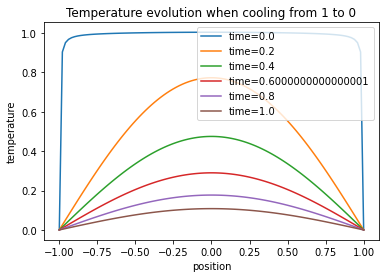

In [3]:
fig, ax = plt.subplots()
xxx = np.linspace(-1, 1, 100)
for t in np.linspace(0, 1, 6):
    uuu = u(t=t, x=xxx, max_k=100)
    ax.plot(xxx, uuu, label=f"time={t}")

ax.legend()
ax.set_xlabel("position")
ax.set_ylabel("temperature")
ax.set_title("Temperature evolution when cooling from 1 to 0")

Text(0.5, 0.98, 'heating from -1 to 0')

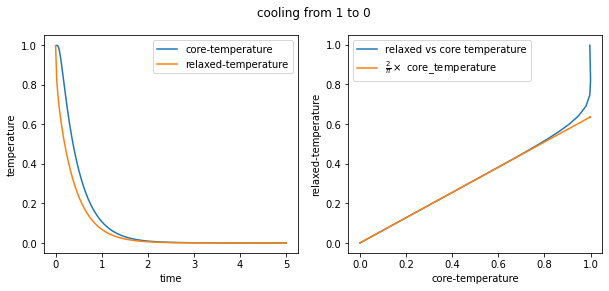

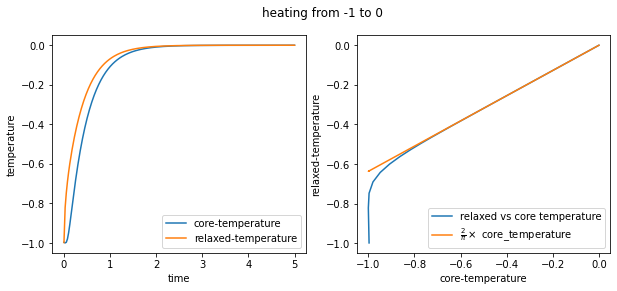

In [5]:
max_k = 100
times = np.linspace(0, 5, 200)
core_temperatures = u(t=times, x=0, max_k=max_k)
relaxed_temperatures = 1 / 2 * integral_u(t=times, max_k=max_k)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])
ax1.plot(times, core_temperatures, label="core-temperature")
ax1.plot(times, relaxed_temperatures, label="relaxed-temperature")
ax1.set_xlabel("time")
ax1.set_ylabel("temperature")
ax1.legend()

ax2.plot(core_temperatures, relaxed_temperatures, label="relaxed vs core temperature")
ax2.plot(core_temperatures, 2 / pi * core_temperatures, label="$\\frac{2}{\\pi} \\times$ core_temperature")
ax2.set_xlabel("core-temperature")
ax2.set_ylabel("relaxed-temperature")
ax2.legend()

fig.suptitle("cooling from 1 to 0")

#############
# the above would be valid if our stuff-temperature was 1 and the environment temperature was 0.
# We are interested in heating instead of cooling so we make the transformation temperature -> - temperature
core_temperatures = - core_temperatures
relaxed_temperatures = - relaxed_temperatures

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4])
ax1.plot(times, core_temperatures, label="core-temperature")
ax1.plot(times, relaxed_temperatures, label="relaxed-temperature")
ax1.set_xlabel("time")
ax1.set_ylabel("temperature")
ax1.legend()

ax2.plot(core_temperatures, relaxed_temperatures, label="relaxed vs core temperature")
ax2.plot(core_temperatures, 2 / pi * core_temperatures, label="$\\frac{2}{\\pi} \\times$ core_temperature")
# ax2.plot(core_temperatures, 1 - 2 / pi * (1 - middle_temperatures),
#          label="1 - $\\frac{2}{\\pi} \\times$ (1 - middle_temperature)")
ax2.set_xlabel("core-temperature")
ax2.set_ylabel("relaxed-temperature")
ax2.legend()

fig.suptitle("heating from -1 to 0")